# Wine Quality Classification

## Fetch dataset into dataFrame

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy
from scipy import stats

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time



from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
# Access the dataset's metadata
print(wine_quality.metadata.uci_id)
print(wine_quality.metadata.num_instances)
print(wine_quality.metadata.additional_info.summary)

# Access features and targets
features_df = df(wine_quality.data.features)
targets_df = df(wine_quality.data.targets)

# Combine into a DataFrame
data_df = pd.concat([features_df, targets_df], axis=1)
data_df.head()

data_features = data_df.drop(columns=["quality"])
data_targets = data_df["quality"]

186
4898
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.



In [4]:
# Information of each feature
data_df.info()
data_df.describe()
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Visualization

D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

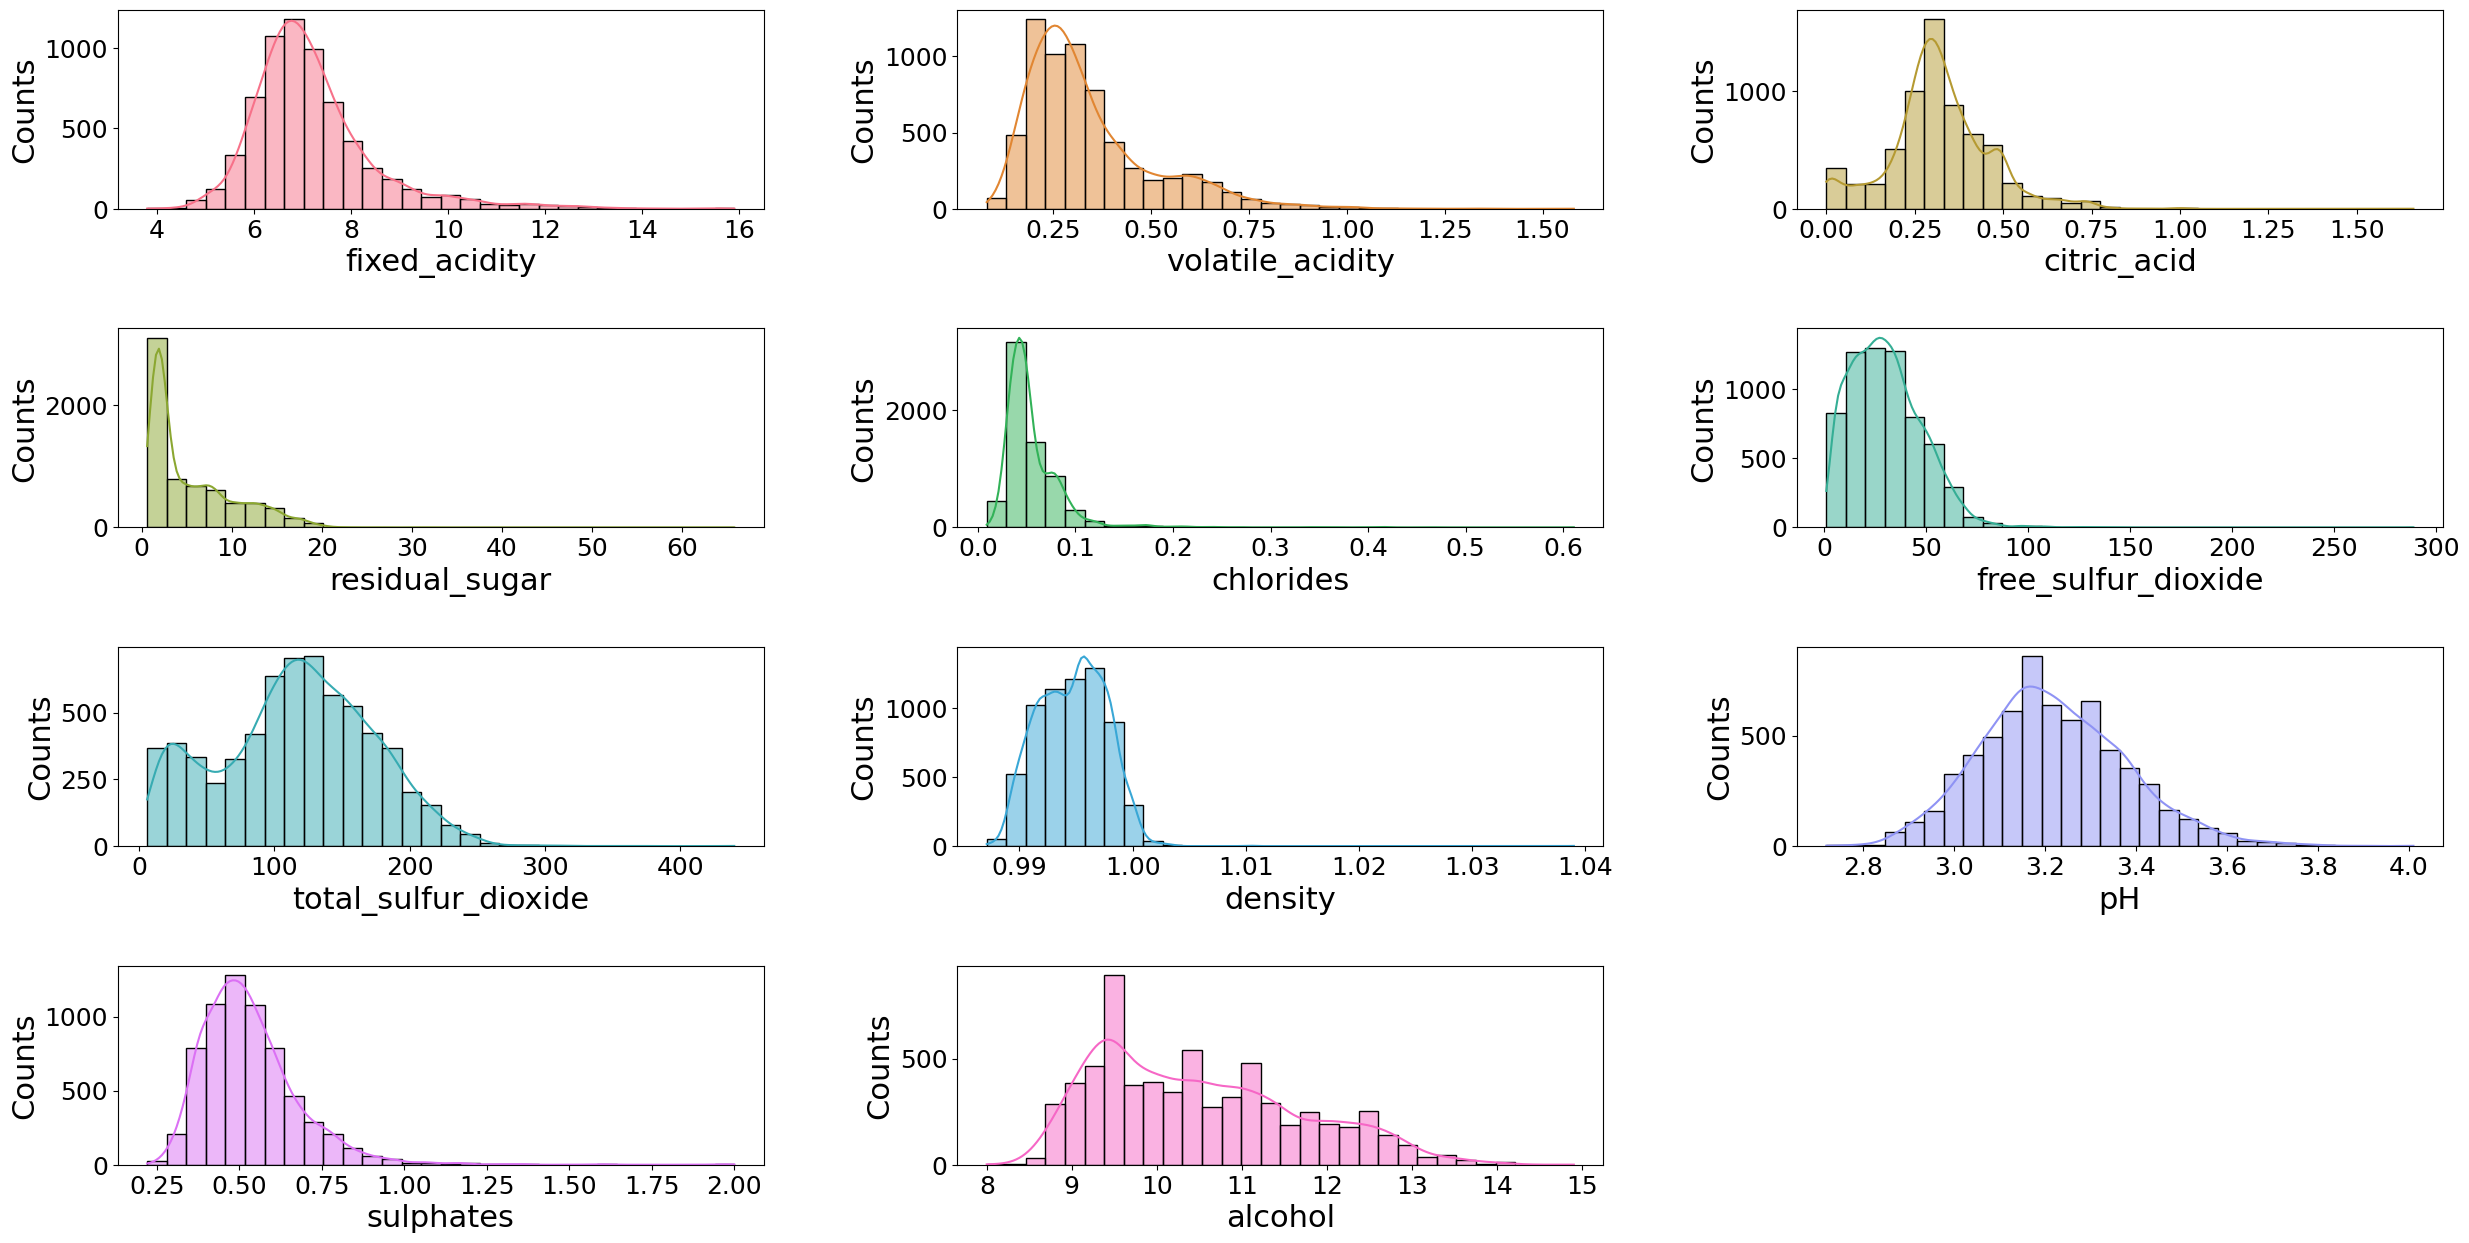

In [5]:
# Histplot of each feature 
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30,15))

for i, column in enumerate(data_df.columns[:11]):
    ax = axes[i // 3, i % 3]  # column index
    palette = sns.color_palette("husl", len(data_df.columns[:11]))  # 生成颜色调色板
    sns.histplot(data_df[column], bins=30, kde=True,ax = ax,color=palette[i])
    
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    ax.set_ylabel('Counts',fontsize = 22)
    ax.set_xlabel(column, fontsize = 22)
    
fig.delaxes(axes[3, 2])    
plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

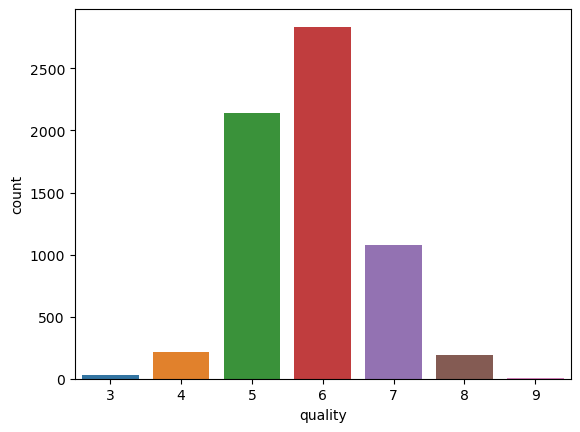

In [6]:
# Countplot of quality
print(data_df['quality'].value_counts())
sns.countplot(x="quality",data = data_df)

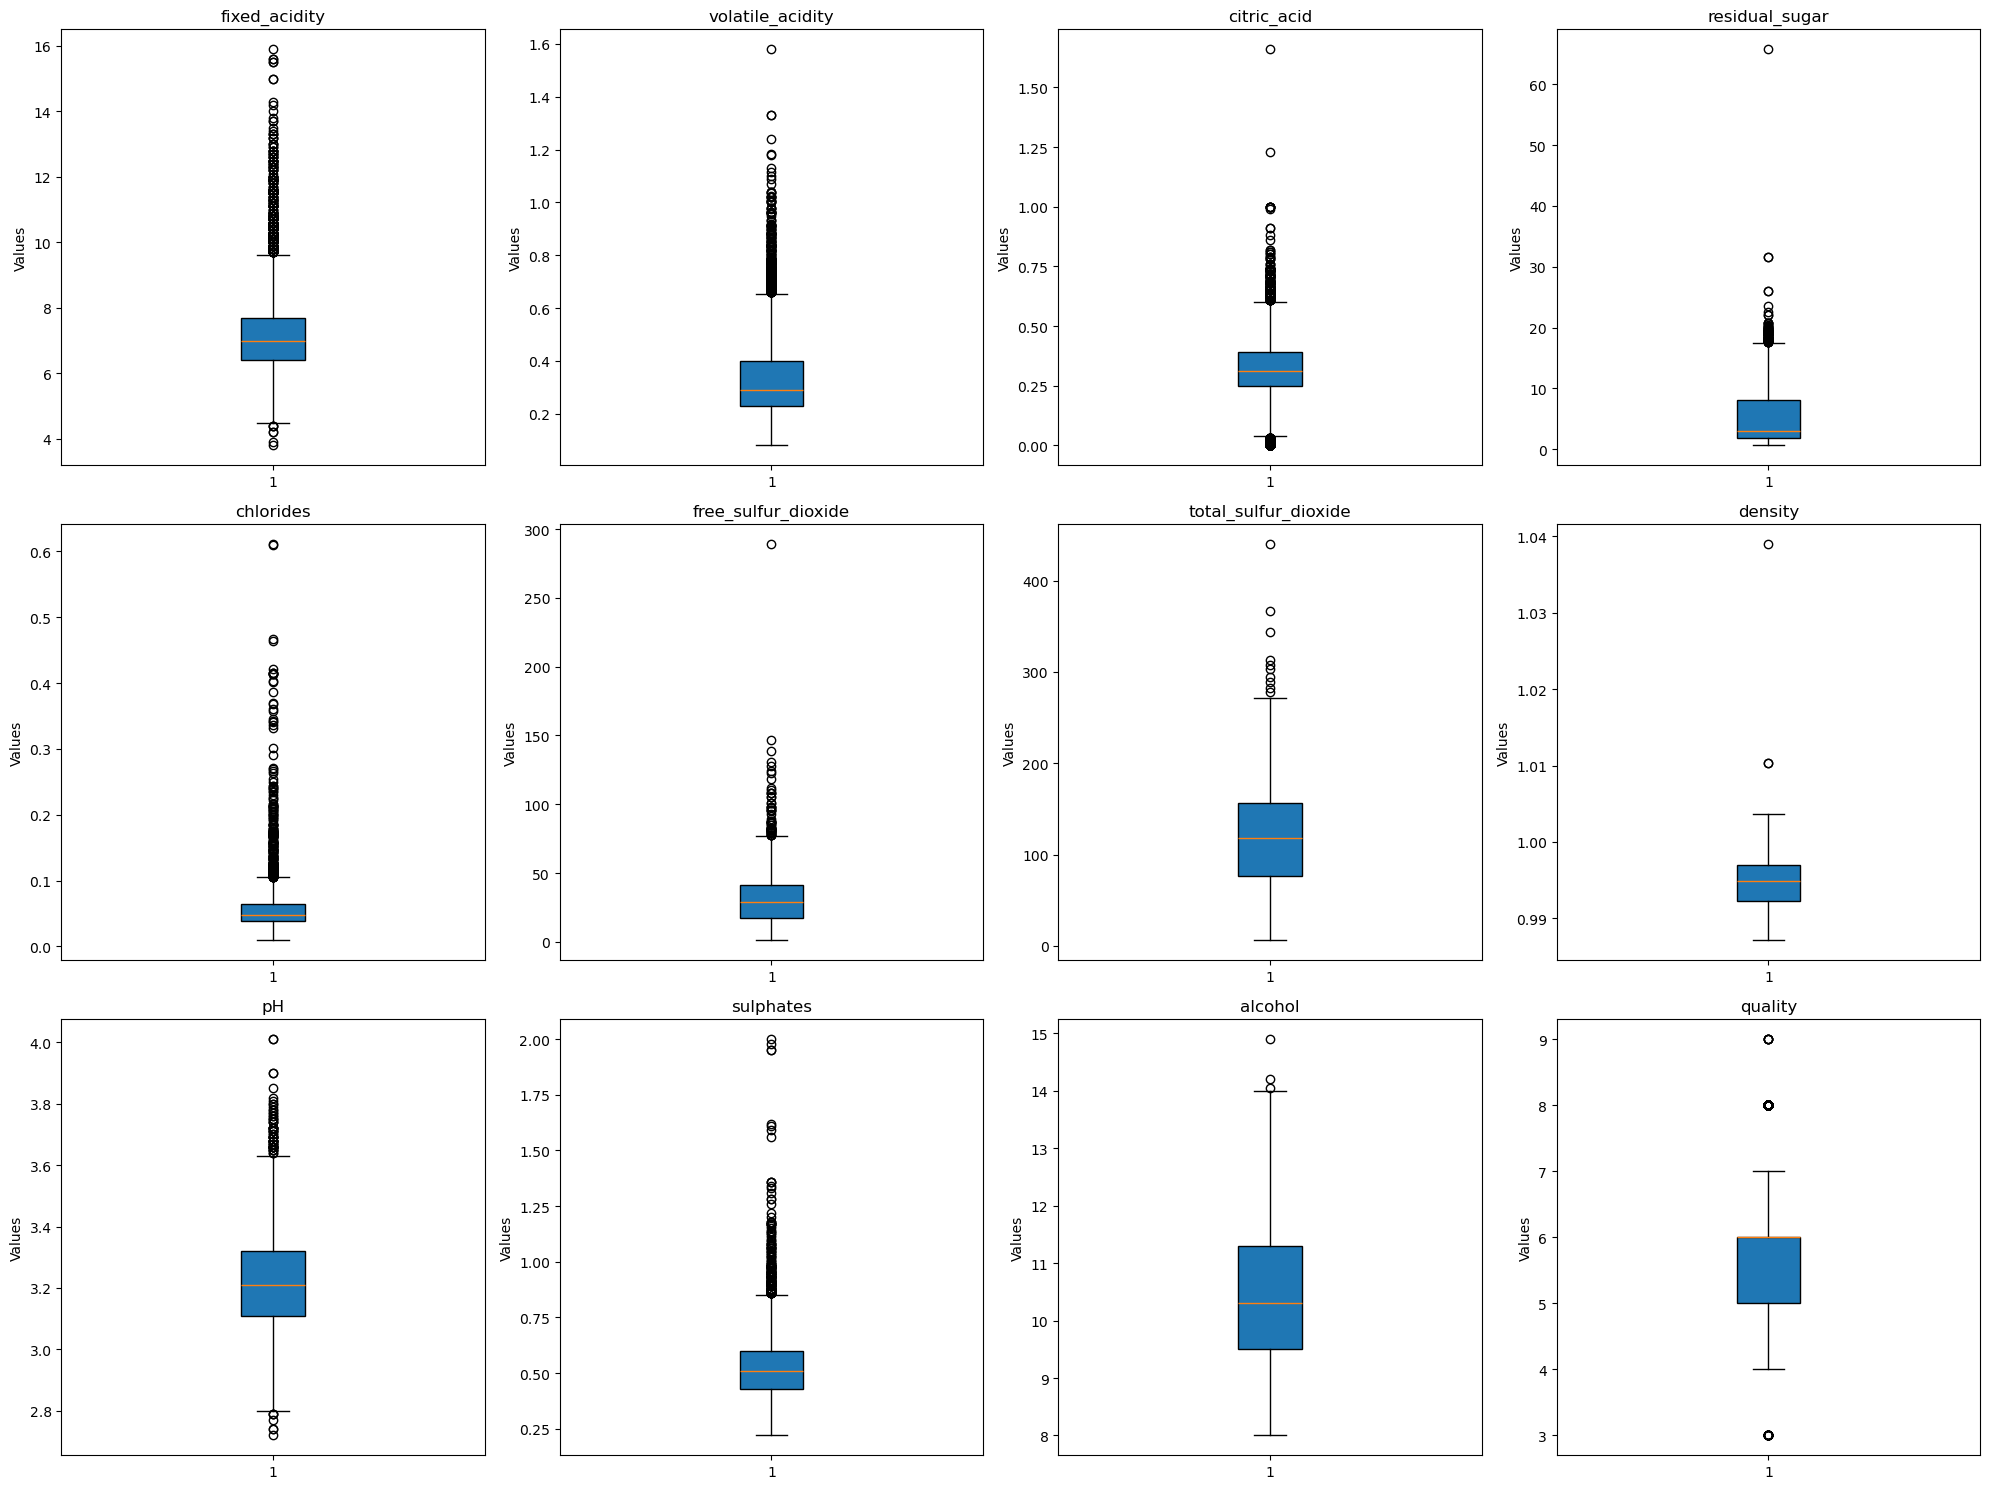

In [7]:
# boxplot(include outliers) of features 

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

for i, column in enumerate(data_df.columns[:]):
    ax = axes[i // 4, i % 4]  # column index
    ax.boxplot(data_df[column], patch_artist=True)
    ax.set_title(column)
    ax.set_ylabel("Values")

plt.tight_layout()

D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


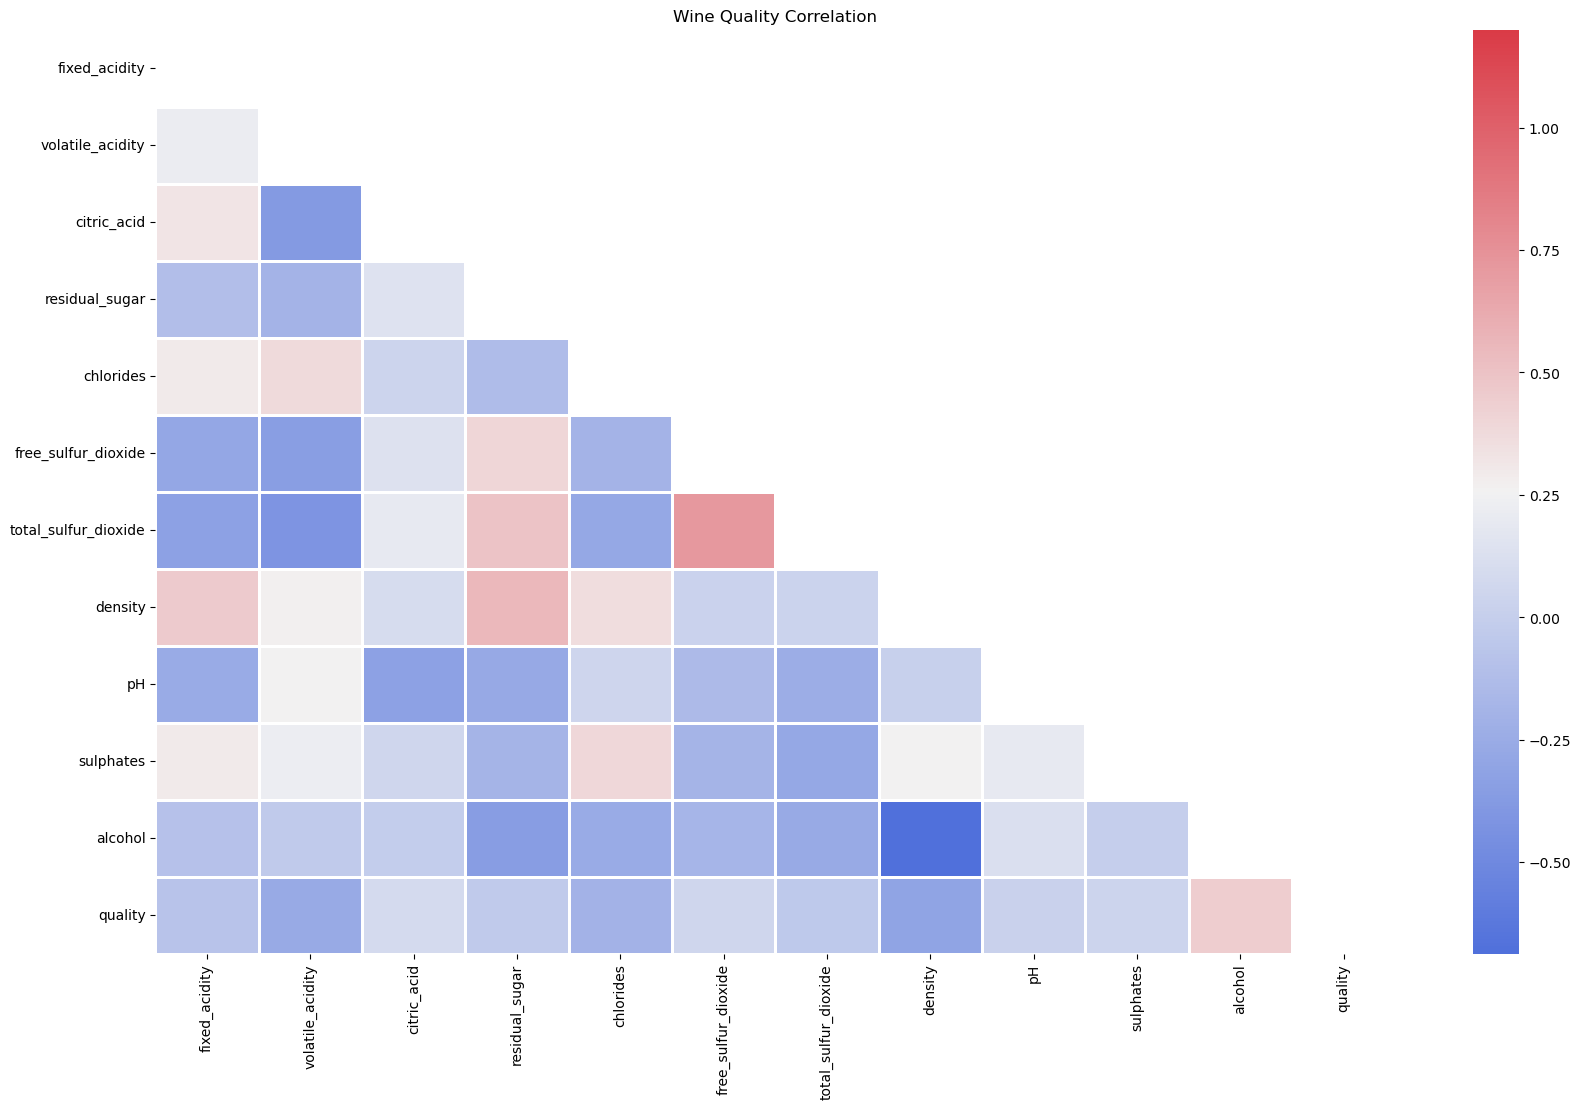

In [8]:
# correlation matrix
data_corrMatt = data_df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(data_corrMatt)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title("Wine Quality Correlation")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt=".2g", linewidths=1);

## Data Cleaning

In [9]:
# Define a function to identify outliers using the IQR method
def identify_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Create a DataFrame to store deleted outliers
deleted_outliers = df(columns=data_df.columns.tolist() + ['Outlier_Feature'])

# Identify outliers and remove them
for feature in data_df.columns[:-1]:
    lower_bound, upper_bound = identify_outliers_iqr(data_df, feature)
    
    # Find samples that are outliers and have moderate quality
    if feature == 'citric_acid':
        outliers = data_df[(data_df[feature] > upper_bound)]
    if feature == 'residual_sugar':
        outliers = data_df[(data_df[feature] > 40)]
    else:
        outliers = data_df[(data_df[feature] < lower_bound) | (data_df[feature] > upper_bound)]
        
   #define specific condition
    quality_condition = (outliers['quality'] >= 4) & (outliers['quality'] <= 7)
    
    # Filter out samples with moderate quality values (4-7)
    outliers_with_quality_condition = outliers[quality_condition]
    
     # Add outliers to the deleted_outliers DataFrame and mark the outlier feature
    if not outliers_with_quality_condition.empty:
        outliers_with_quality_condition = outliers_with_quality_condition.copy()
        outliers_with_quality_condition['Outlier_Feature'] = feature
        deleted_outliers = pd.concat([deleted_outliers, outliers_with_quality_condition])
    
    # Remove these samples from the dataset
    data_df = data_df[~data_df.index.isin(outliers[quality_condition].index)]

C:\Users\24522\AppData\Local\Temp\ipykernel_4560\98092685.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  deleted_outliers = pd.concat([deleted_outliers, outliers_with_quality_condition])


In [10]:
deleted_outliers

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Outlier_Feature
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,fixed_acidity
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.600000,5,fixed_acidity
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.600000,5,fixed_acidity
113,10.1,0.31,0.44,2.3,0.080,22.0,46.0,0.99880,3.32,0.67,9.700000,6,fixed_acidity
197,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.100000,6,fixed_acidity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000,7.1,0.38,0.29,13.6,0.041,30.0,137.0,0.99461,3.02,0.96,12.100000,6,sulphates
6181,6.3,0.37,0.51,6.3,0.048,35.0,146.0,0.99430,3.10,1.01,10.500000,6,sulphates
6295,6.1,0.15,0.40,1.2,0.030,19.0,84.0,0.98926,3.19,0.96,13.000000,6,sulphates
6417,6.0,0.27,0.40,1.7,0.021,18.0,82.0,0.98910,3.24,0.95,13.133333,6,sulphates


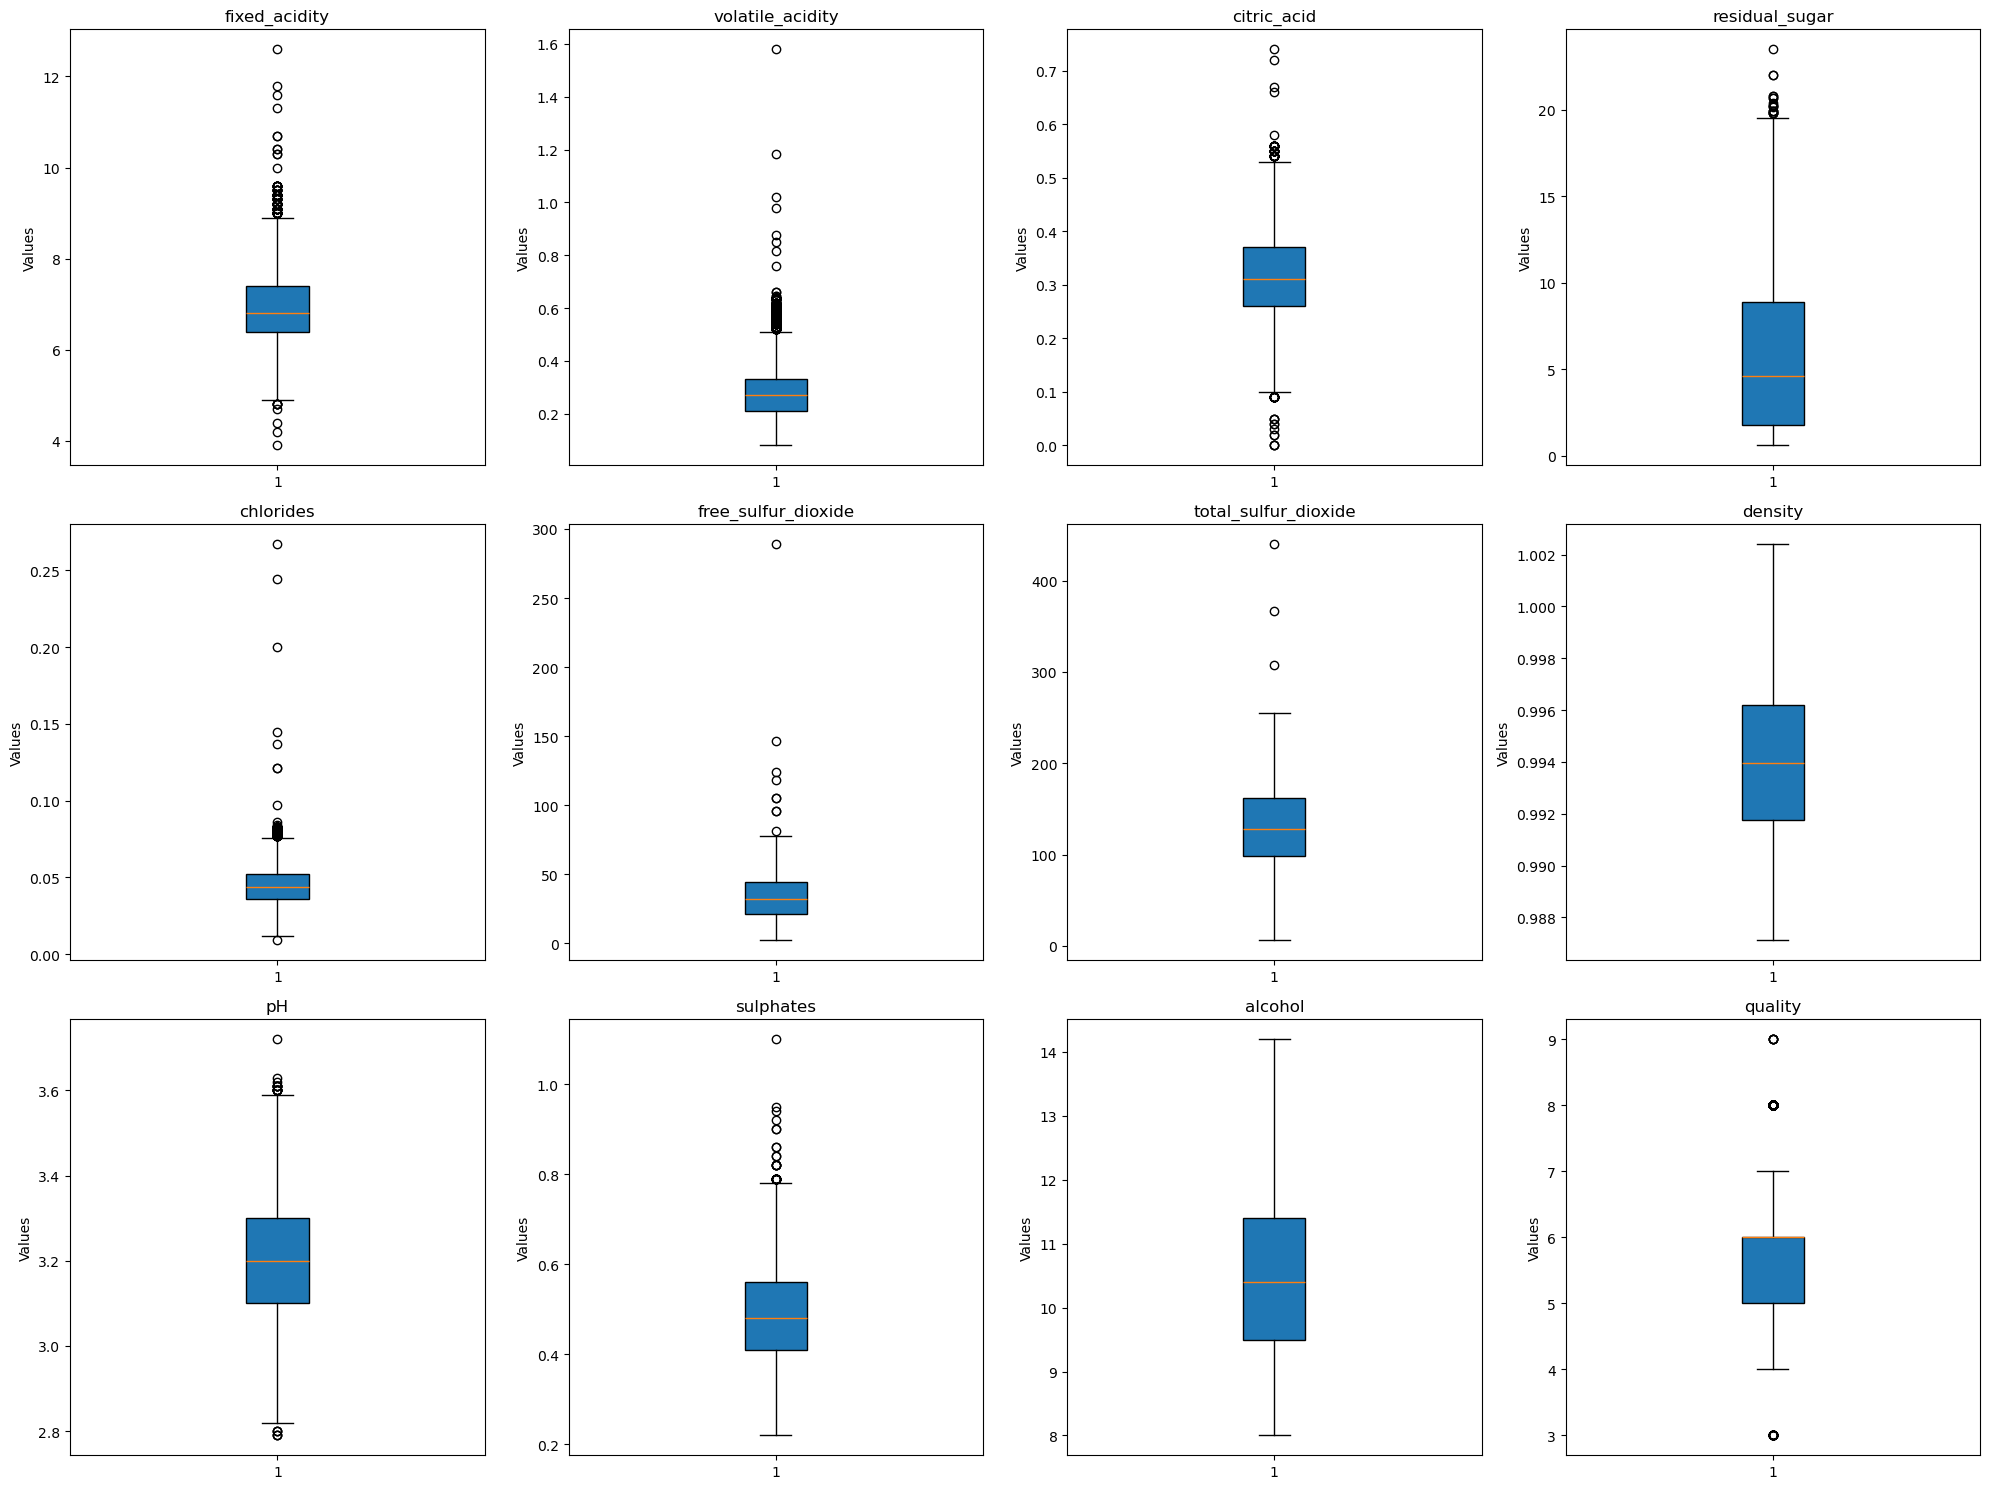

In [11]:
# boxplot of cleaned features (no outliers)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

for i, column in enumerate(data_df.columns[:]):
    ax = axes[i // 4, i % 4]  # column index
    ax.boxplot(data_df[column], patch_artist=True)
    ax.set_title(column)
    ax.set_ylabel("Values")

plt.tight_layout()

In [12]:
# z-score normalization
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(data_df.drop(columns=['quality']))

data_scaled = pd.concat(
    [pd.DataFrame(feature_scaled, columns=data_df.columns.drop('quality'), index=data_df.index),data_df['quality']],
    axis=1
)
data_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
20,2.288476,-0.622033,1.736206,-0.859038,2.206699,-0.250075,-1.438449,0.951895,1.270599,0.309187,-0.969309,6
21,0.782113,0.953268,-0.111115,-0.755950,2.554133,-0.620477,-1.209985,1.441188,2.153064,1.395670,-0.722372,5
25,-0.724249,0.953268,-1.741104,-0.941509,2.415159,-1.361281,-2.206917,0.497552,0.931189,0.580808,-1.051621,5
26,0.782113,1.138598,-0.871776,-0.859038,2.415159,-1.793417,-2.456150,0.742198,0.523897,0.852428,-0.886997,5
33,-0.029005,2.945560,-2.175767,0.975940,1.928753,0.428996,-0.960752,1.825633,1.677890,0.218647,-0.969309,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.840123,-0.714697,-0.328447,-0.900274,-0.433794,-0.558743,-0.773827,-1.026246,0.456016,0.037566,0.512311,6
6493,-0.376627,0.304615,0.432215,0.419261,0.122099,1.478468,0.804649,0.287855,-0.358568,-0.324595,-0.804684,5
6494,-0.492501,-0.436703,-1.415106,-0.982745,-0.294821,-0.188341,-0.379208,-0.536953,-1.444678,-0.324595,-0.969309,6
6495,-1.651242,0.026621,-0.219781,-1.003362,-1.615068,-0.805678,-0.399978,-1.882509,0.931189,-1.048917,1.829306,7


In [13]:
# Combine alcohol,density and residual_sugar
data_combined = data_scaled

data_combined['free_sulfur_ratio'] = data_scaled['free_sulfur_dioxide'] / data_scaled['total_sulfur_dioxide']
data_combined = data_combined.drop(columns=['total_sulfur_dioxide','free_sulfur_dioxide'])

D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: title={'center': 'Wine Quality Correlation'}>

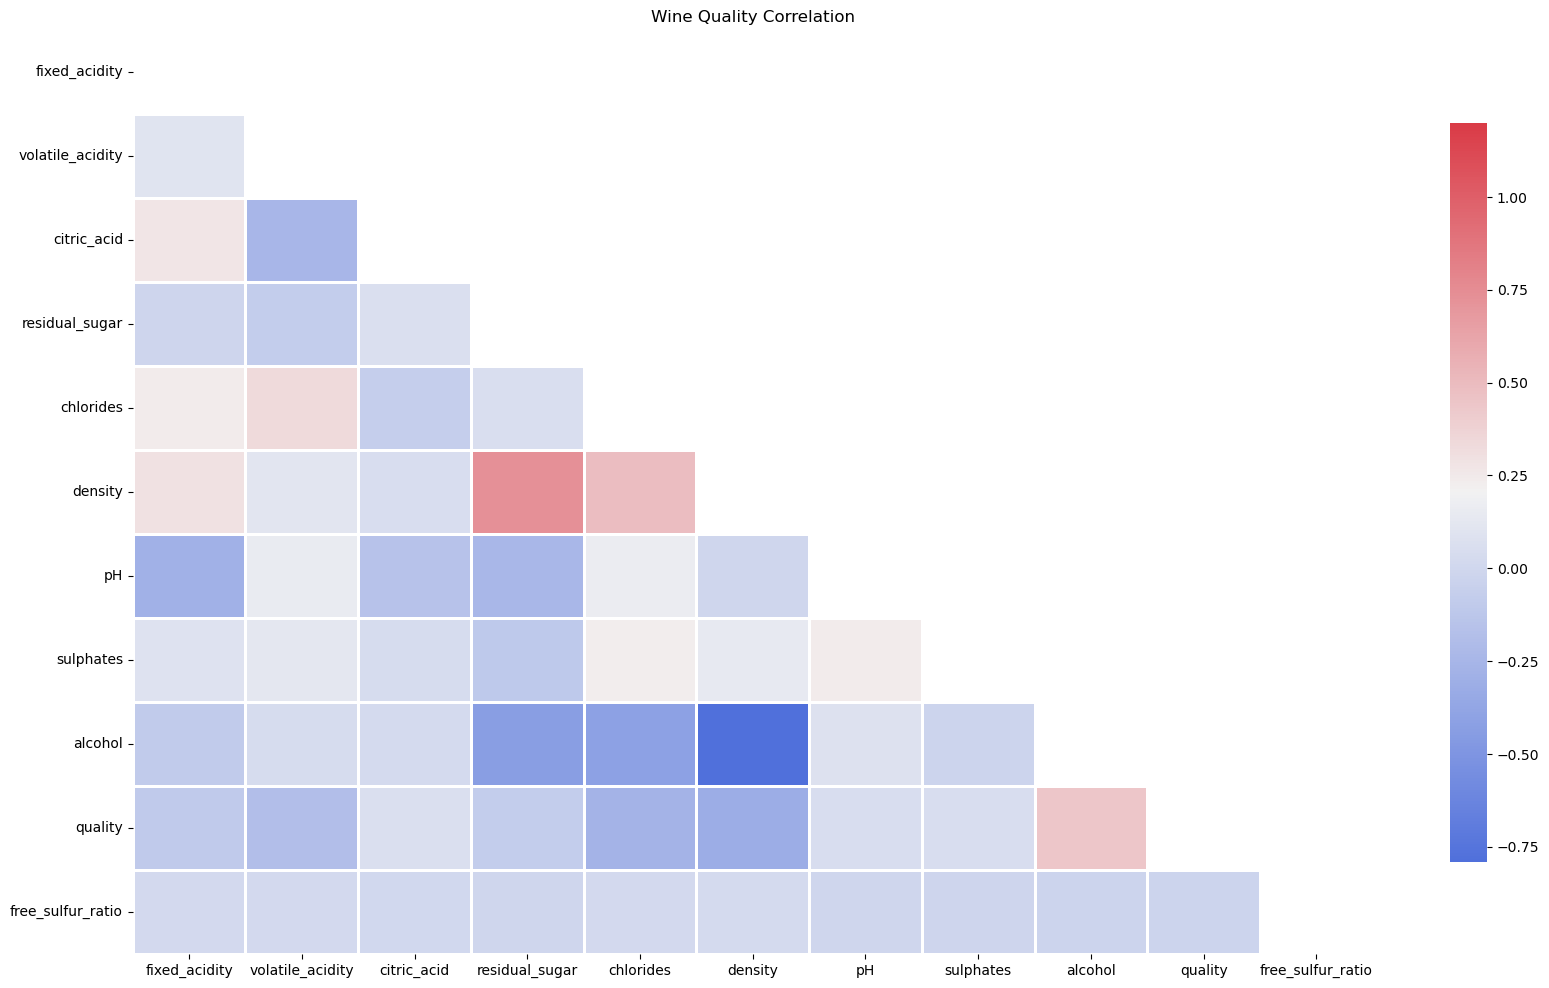

In [14]:
# correlation matrix
data_corrMatt = data_combined.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(data_corrMatt, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title("Wine Quality Correlation")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corrMatt, 
            vmax=1.2, 
            square=False, 
            cmap=cmap, 
            mask=mask, 
            ax=ax, 
            annot=True,          # Display the values in the heatmap
            fmt=".2f",          # Format the numbers (2 significant digits)
            linewidths=1, 
            cbar_kws={"shrink": .8})  # Optional: adjust color bar size

## Oversampling

In [15]:
# Use SMOTE to deal with the imbalanced target data

from imblearn.over_sampling import SMOTE

X = data_combined.drop(columns=['quality'])  # Features
y = data_combined['quality']  # Target variable

# Apply SMOTE
smote = SMOTE(random_state=42,k_neighbors=3)

X_resampled, y_resampled = smote.fit_resample(X, y)

data_resampled = df(X_resampled, columns=X.columns)
data_resampled['quality'] = y_resampled

D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

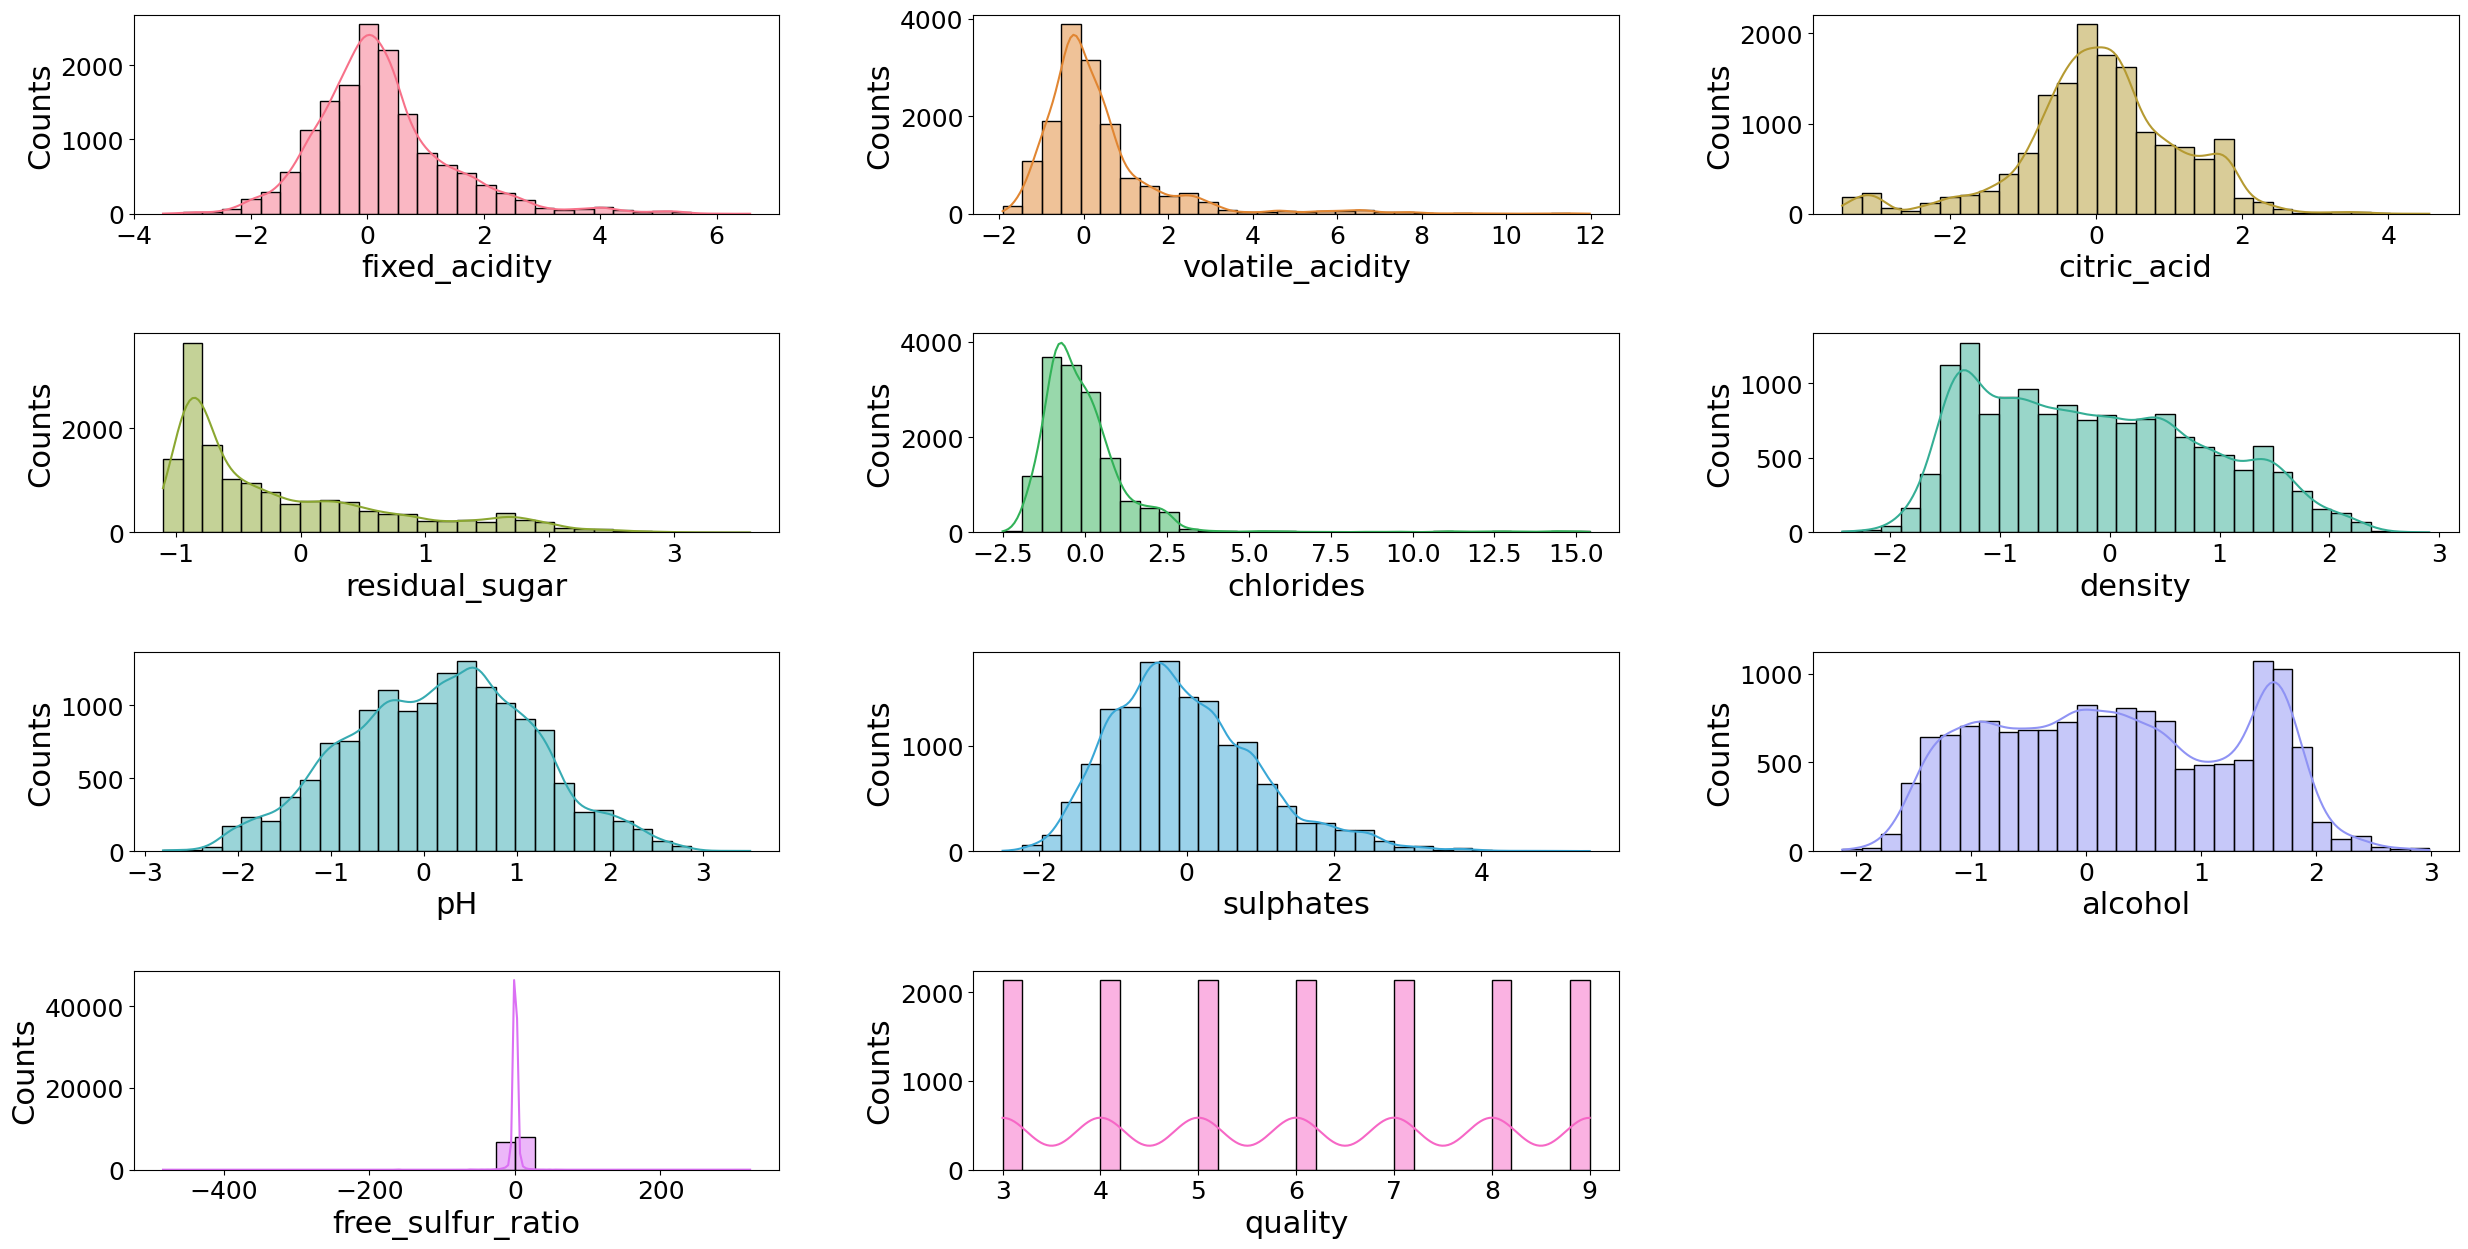

In [16]:
# Histplot after oversampling
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30,15))

for i, column in enumerate(data_resampled.columns[:11]):
    ax = axes[i // 3, i % 3]  # column index
    palette = sns.color_palette("husl", len(data_df.columns[:11]))  # 生成颜色调色板
    sns.histplot(data_resampled[column], bins=30, kde=True,ax = ax,color=palette[i])
    
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    ax.set_ylabel('Counts',fontsize = 22)
    ax.set_xlabel(column, fontsize = 22)
    
fig.delaxes(axes[3, 2])    
plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

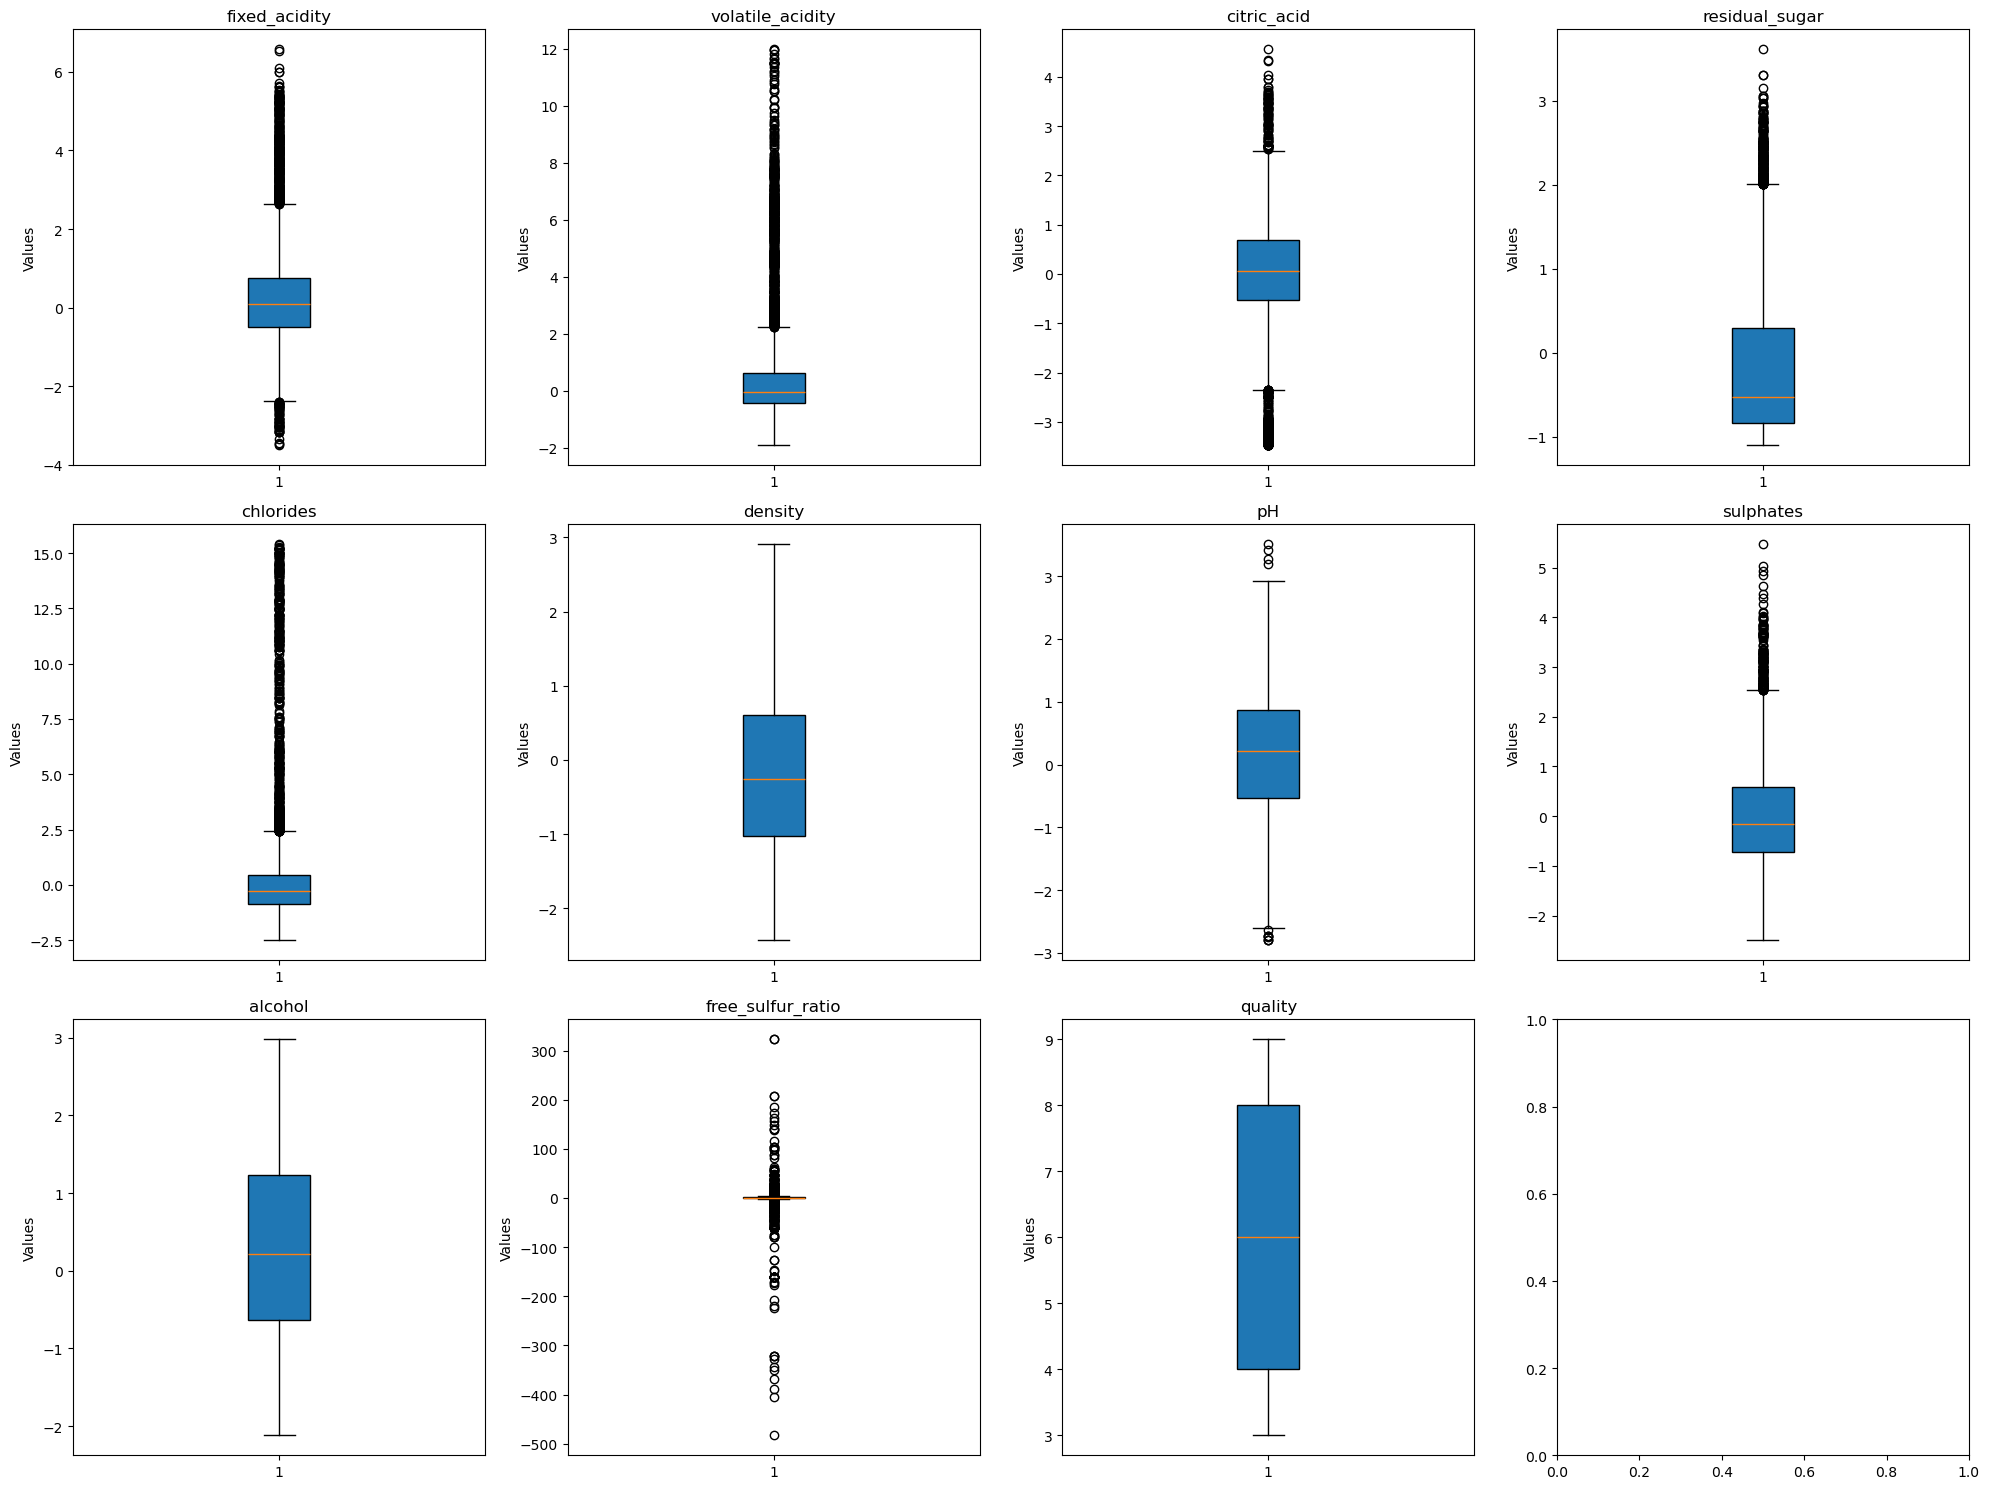

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

for i, column in enumerate(data_resampled.columns[:]):
    ax = axes[i // 4, i % 4]  # column index
    ax.boxplot(data_resampled[column], patch_artist=True)
    ax.set_title(column)
    ax.set_ylabel("Values")

plt.tight_layout()

## Feature Importance

In [18]:
data_features1 = data_resampled.drop(columns=["quality"])
data_targets1 = data_resampled["quality"]

In [19]:
# split the data sets: traning set - 80%, validation set - 20%
fea_train, fea_val, tar_train, tar_val = train_test_split(data_features1, data_targets1, test_size=0.2, random_state=42, stratify=data_targets1)

### MDI in RandomForest

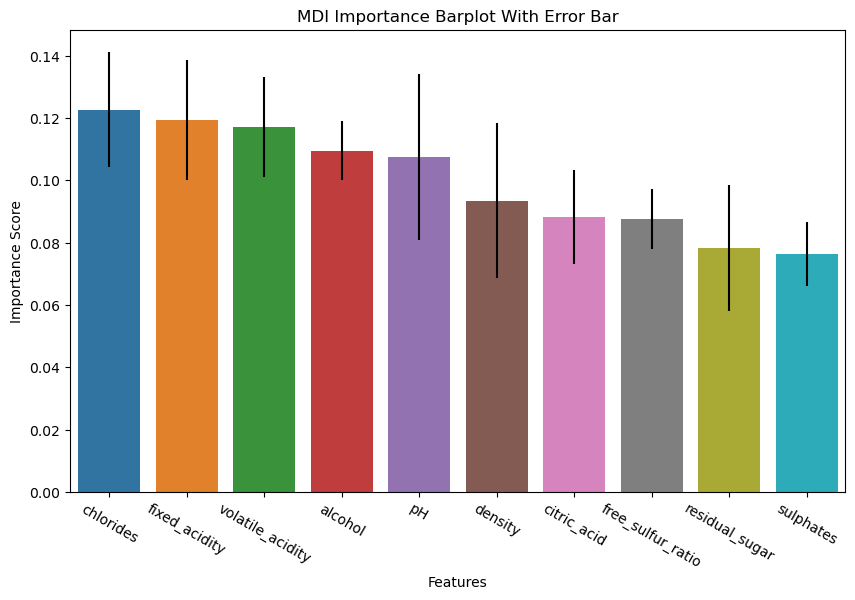

In [20]:
# Feature importance based on mean decrease in impurity

# Define the Random Forest model
rf = RandomForestClassifier(random_state=0,n_estimators=300,max_depth=20,class_weight='balanced')
rf.fit(fea_train, tar_train)

# Calculate feature importances
importances = rf.feature_importances_

mdi_importance = pd.DataFrame({
    "Feature": data_features1.columns,
    "Importance": importances
}).sort_values(by='Importance', ascending=False)

# Std of feature importances
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)

# Barplot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Importance", data=mdi_importance,yerr=std, capsize=.2)
plt.title("MDI Importance Barplot With Error Bar")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=-30)
plt.show()

In [21]:
# Calculate the accuracy on training set
train_pred = rf.predict(fea_train)
train_accuracy = accuracy_score(tar_train, train_pred)

# Calculate the accuracy on validation set
val_pred = rf.predict(fea_val)
val_accuracy = accuracy_score(tar_val, val_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")

Train Accuracy: 1.00
Validation Accuracy: 0.91


In [22]:
# Sort by importance and select the top 8 features
top_features = mdi_importance.head(8)
selected_features = top_features['Feature'].tolist()
print("Selected Top 8 Features:", selected_features)

# Calculate accuracy on validation set
fea_val_selected = fea_val[selected_features]
rf_val = RandomForestClassifier(random_state=1,n_estimators=300,max_depth=20,class_weight='balanced')
rf_val.fit(fea_train[selected_features], tar_train)
tar_val_pred = rf_val.predict(fea_val_selected)
val_accuracy = accuracy_score(tar_val, tar_val_pred)

print(f"MDI Validation accuracy with top 8 features: {val_accuracy:.2f}")

Selected Top 8 Features: ['chlorides', 'fixed_acidity', 'volatile_acidity', 'alcohol', 'pH', 'density', 'citric_acid', 'free_sulfur_ratio']
MDI Validation accuracy with top 8 features: 0.90


In [23]:
from sklearn.model_selection import KFold, cross_val_score


# KFold cross-validator
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=2)
scores = cross_val_score(rf_val, data_features1, data_targets1, cv=kf, scoring='accuracy')
print("k-fold cross valuation:")
print("Scores for each fold:", scores)
print("Mean accuracy:", scores.mean())

k-fold cross valuation:
Scores for each fold: [0.9131016  0.89772727 0.89304813 0.91042781 0.90909091 0.9184492
 0.9157754  0.92179144 0.9144385  0.9090301 ]
Mean accuracy: 0.9102880367714127


### Feature Permutation in RandomForest

Elapsed time to compute the importances: 13.358 seconds


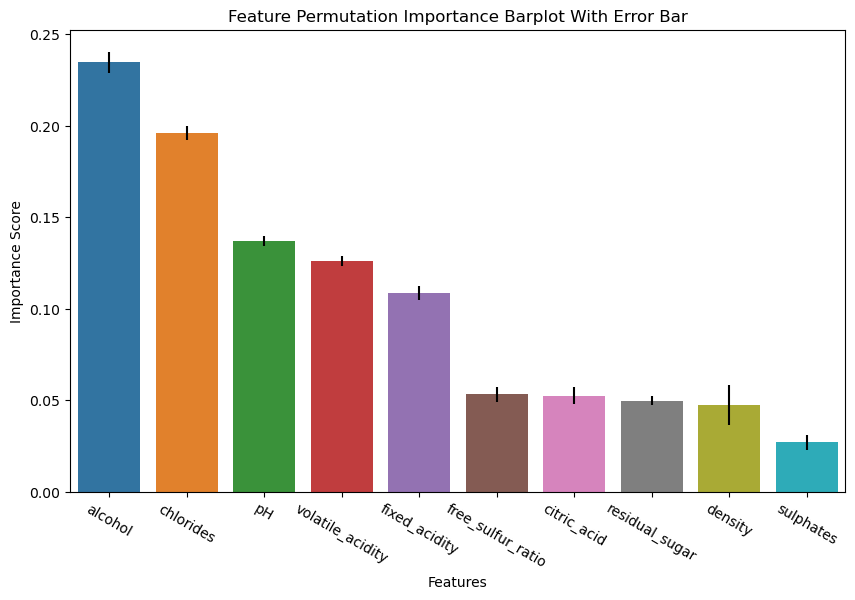

In [24]:
# Feature importance based on feature permutation
start_time = time.time()
fp = permutation_importance(
    rf, fea_val, tar_val, n_repeats=10, random_state=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
fp_importances = pd.DataFrame({
    "Feature": data_features1.columns,
    "Importance": fp.importances_mean
}).sort_values(by='Importance', ascending=False)

# Barplot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Importance", data=fp_importances,yerr=fp.importances_std, capsize=.2)
plt.title("Feature Permutation Importance Barplot With Error Bar")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=-30)
plt.show()

In [25]:
# Sort by importance and select the top 8 features
top_features = fp_importances.head(8)
selected_features = top_features['Feature'].tolist()
print("Selected Top 8 Features:", selected_features)

# Calculate accuracy on validation set
fea_val_selected = fea_val[selected_features]
fp_val = RandomForestClassifier(random_state=3,n_estimators=300,max_depth=20)
fp_val.fit(fea_train[selected_features], tar_train)
tar_val_pred = fp_val.predict(fea_val_selected)
val_accuracy = accuracy_score(tar_val, tar_val_pred)

print(f"Feature Permutation Validation accuracy with top 8 features: {val_accuracy:.2f}")

Selected Top 8 Features: ['alcohol', 'chlorides', 'pH', 'volatile_acidity', 'fixed_acidity', 'free_sulfur_ratio', 'citric_acid', 'residual_sugar']
Feature Permutation Validation accuracy with top 8 features: 0.90


In [26]:
from sklearn.model_selection import KFold, cross_val_score


# KFold cross-validator
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=2)
scores = cross_val_score(fp_val, data_features1, data_targets1, cv=kf, scoring='accuracy')
print("k-fold cross valuation:")
print("Scores for each fold:", scores)
print("Mean accuracy:", scores.mean())

k-fold cross valuation:
Scores for each fold: [0.9131016  0.90106952 0.89772727 0.91510695 0.90775401 0.91510695
 0.91377005 0.92179144 0.91176471 0.91438127]
Mean accuracy: 0.9111573784271995


### Learning Curve

D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

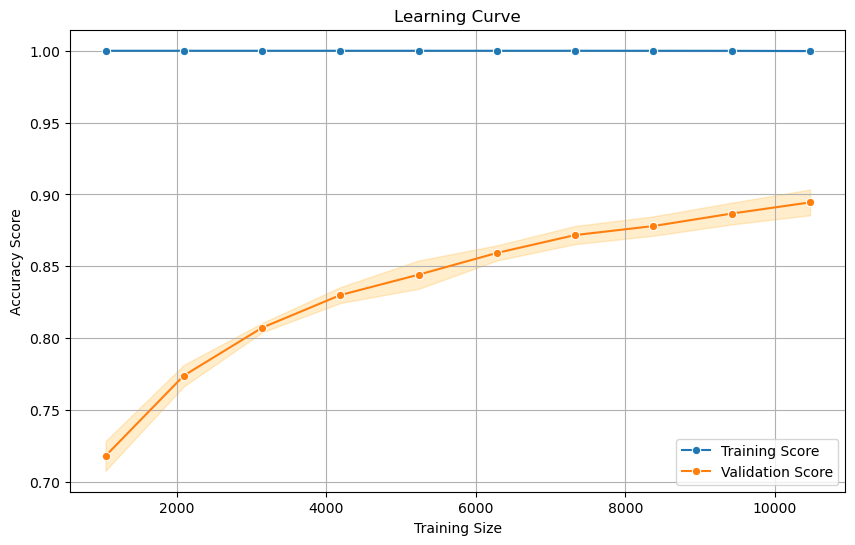

In [27]:
from sklearn.model_selection import learning_curve

# Leaning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf,
    fea_train,
    tar_train,
    cv=8,  # number of folds
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

learning_curve_data = pd.DataFrame({
    'Training Size': train_sizes,
    'Train Score': train_scores_mean,
    'Test Score': test_scores_mean,
    'Train Std': train_scores_std,
    'Test Std': test_scores_std
})

# Use Seaborn to draw the learning curve
plt.figure(figsize=(10, 6))
sns.lineplot(data=learning_curve_data, x='Training Size', y='Train Score', label='Training Score', marker='o')
sns.lineplot(data=learning_curve_data, x='Training Size', y='Test Score', label='Validation Score', marker='o')

# Fill the standard deviation area
plt.fill_between(learning_curve_data['Training Size'], 
                 learning_curve_data['Train Score'] - learning_curve_data['Train Std'],
                 learning_curve_data['Train Score'] + learning_curve_data['Train Std'], 
                 color='blue', alpha=0.2)
plt.fill_between(learning_curve_data['Training Size'], 
                 learning_curve_data['Test Score'] - learning_curve_data['Test Std'],
                 learning_curve_data['Test Score'] + learning_curve_data['Test Std'], 
                 color='orange', alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid()

plt.show()

## Select Features based on results

In [28]:
final_select_features = ['alcohol', 'chlorides', 'fixed_acidity', 'volatile_acidity','free_sulfur_ratio', 'pH', 'citric_acid']
data_feature_selected = data_features1[final_select_features]

In [29]:
# map target to four level
data_target_mapped = np.select(
    [
        (data_targets1 >= 3) & (data_targets1 <= 4),  
        (data_targets1 >= 5) & (data_targets1 <= 6), 
        (data_targets1 >= 7) & (data_targets1 <= 8),  
        (data_targets1 == 9)
    ],
    [0, 1, 2, 3],# bad, normal, good, excellent
)

print(np.unique(data_target_mapped, return_counts=True))

(array([0, 1, 2, 3]), array([4274, 4274, 4274, 2137], dtype=int64))


In [30]:
# re-split the data sets: traning set - 70%, validation set - 15% ， test set - 15%
fea_train, fea_val, tar_train, tar_val = train_test_split(data_feature_selected, data_target_mapped, test_size=0.3, random_state=42, stratify=data_target_mapped)
fea_val, fea_test, tar_val, tar_test = train_test_split(fea_val, tar_val, test_size=0.5, random_state=42, stratify=tar_val)

## Classification models

In [31]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split

def classify(model, x, ys):
    ys = ys.ravel()
    # train the modelx
    model.fit(x, ys)
    print("Accuracy:", model.score(fea_val, tar_val) * 100, "%")

### LogisticRegression

Accuracy: 64.92869875222816 %


D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[0.64142539 0.65478842 0.63697105 0.65478842 0.65178571]
Average score and standard deviation: (64.80 +- 0.329)%


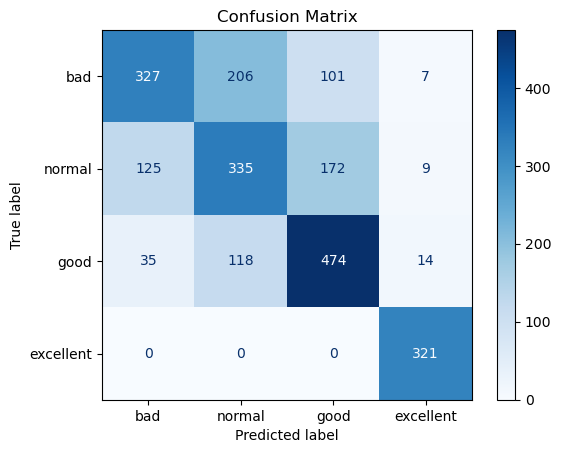

              precision    recall  f1-score   support

         bad       0.67      0.51      0.58       641
      normal       0.51      0.52      0.52       641
        good       0.63      0.74      0.68       641
   excellent       0.91      1.00      0.96       321

    accuracy                           0.65      2244
   macro avg       0.68      0.69      0.68      2244
weighted avg       0.65      0.65      0.64      2244



In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
classify(model, fea_train, tar_train)

# cross-validation
n_folds = 5
clf_cv = LogisticRegression()
scores = cross_val_score(clf_cv, fea_val, tar_val, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on validation set
y_pred = model.predict(fea_val)

# Confusion matrix
cm = confusion_matrix(tar_val, y_pred)

# Visualisation
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'normal', 'good', 'excellent'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

# classification report
print(classification_report(tar_val, y_pred, target_names=['bad', 'normal', 'good', 'excellent']))


### DecisionTree

Accuracy: 87.92335115864527 %
[0.73273942 0.76169265 0.74610245 0.74164811 0.75446429]
Average score and standard deviation: (74.73 +- 0.449)%


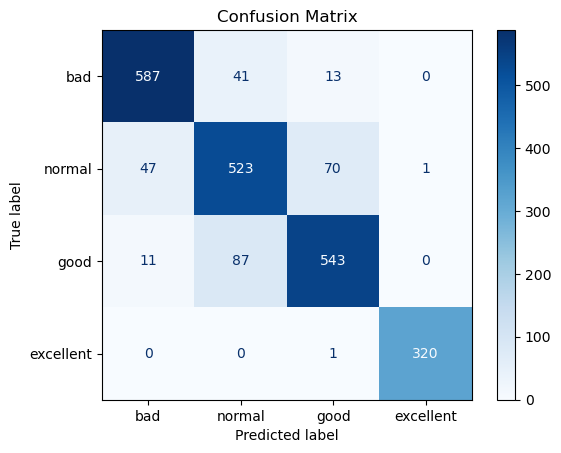

              precision    recall  f1-score   support

         bad       0.91      0.92      0.91       641
      normal       0.80      0.82      0.81       641
        good       0.87      0.85      0.86       641
   excellent       1.00      1.00      1.00       321

    accuracy                           0.88      2244
   macro avg       0.89      0.89      0.89      2244
weighted avg       0.88      0.88      0.88      2244



In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, fea_train, tar_train)

# cross-validation
n_folds = 5
clf_cv = DecisionTreeClassifier()
scores = cross_val_score(clf_cv, fea_val, tar_val, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

# Predict on validation set
y_pred = model.predict(fea_val)

# Confusion matrix
cm = confusion_matrix(tar_val, y_pred)

# Visualisation
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'normal', 'good', 'excellent'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# classification report
print(classification_report(tar_val, y_pred, target_names=['bad', 'normal', 'good', 'excellent']))


### RandomForest

Accuracy: 93.04812834224599 %
[0.83296214 0.82182628 0.86414254 0.83296214 0.83482143]
Average score and standard deviation: (83.73 +- 0.634)%


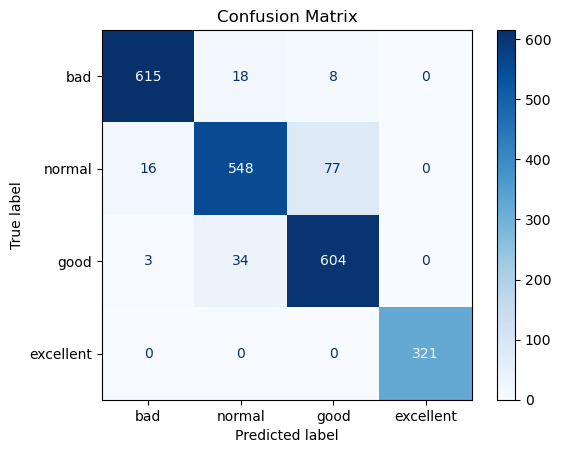

              precision    recall  f1-score   support

         bad       0.97      0.96      0.96       641
      normal       0.91      0.85      0.88       641
        good       0.88      0.94      0.91       641
   excellent       1.00      1.00      1.00       321

    accuracy                           0.93      2244
   macro avg       0.94      0.94      0.94      2244
weighted avg       0.93      0.93      0.93      2244



In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, fea_train, tar_train)

# cross-validation
n_folds = 5
clf_cv = RandomForestClassifier()
scores = cross_val_score(clf_cv, fea_val, tar_val, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

# Predict on validation set
y_pred = model.predict(fea_val)

# Confusion matrix
cm = confusion_matrix(tar_val, y_pred)

# Visualisation
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'normal', 'good', 'excellent'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# classification report
print(classification_report(tar_val, y_pred, target_names=['bad', 'normal', 'good', 'excellent']))


### Gaussian Naive Bayes 

Accuracy: 56.90730837789661 %
[0.53674833 0.55679287 0.5545657  0.55233853 0.59151786]
Average score and standard deviation: (55.84 +- 0.805)%


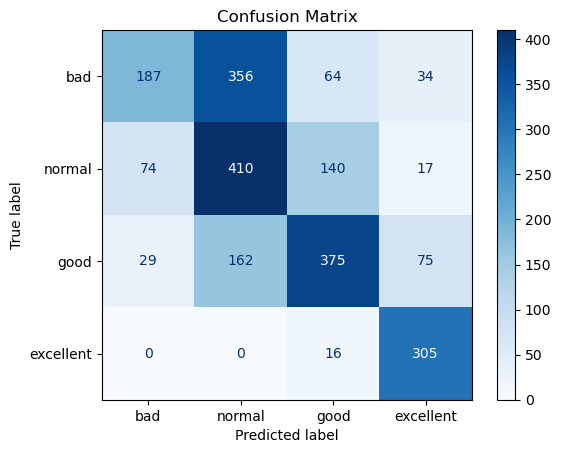

              precision    recall  f1-score   support

         bad       0.64      0.29      0.40       641
      normal       0.44      0.64      0.52       641
        good       0.63      0.59      0.61       641
   excellent       0.71      0.95      0.81       321

    accuracy                           0.57      2244
   macro avg       0.61      0.62      0.59      2244
weighted avg       0.59      0.57      0.55      2244



In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model, fea_train, tar_train)

# cross-validation
n_folds = 5
clf_cv = GaussianNB()
scores = cross_val_score(clf_cv, fea_val, tar_val, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

# Predict on validation set
y_pred = model.predict(fea_val)

# Confusion matrix
cm = confusion_matrix(tar_val, y_pred)

# Visualisation
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'normal', 'good', 'excellent'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# classification report
print(classification_report(tar_val, y_pred, target_names=['bad', 'normal', 'good', 'excellent']))


### K-Neighbors

Accuracy: 90.46345811051694 %
[0.77728285 0.79287305 0.79510022 0.79732739 0.76785714]
Average score and standard deviation: (78.61 +- 0.515)%


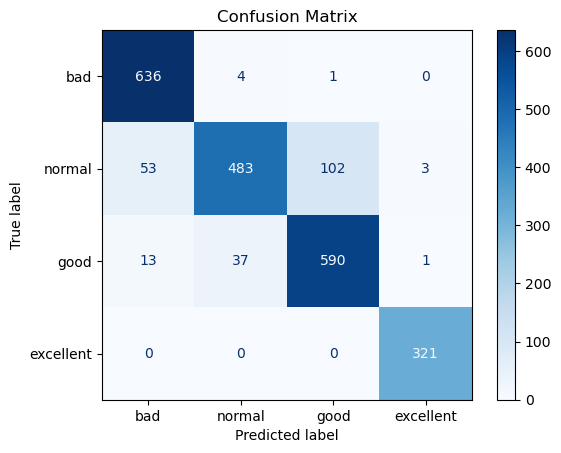

              precision    recall  f1-score   support

         bad       0.91      0.99      0.95       641
      normal       0.92      0.75      0.83       641
        good       0.85      0.92      0.88       641
   excellent       0.99      1.00      0.99       321

    accuracy                           0.90      2244
   macro avg       0.92      0.92      0.91      2244
weighted avg       0.91      0.90      0.90      2244



In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classify(model, fea_train, tar_train)

# cross-validation
n_folds = 5
clf_cv = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf_cv, fea_val, tar_val, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

# Predict on validation set
y_pred = model.predict(fea_val)

# Confusion matrix
cm = confusion_matrix(tar_val, y_pred)

# Visualisation
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'normal', 'good', 'excellent'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# classification report
print(classification_report(tar_val, y_pred, target_names=['bad', 'normal', 'good', 'excellent']))


### Support Vector Machine

Accuracy: 83.19964349376114 %
[0.74610245 0.75946548 0.75946548 0.74832962 0.74107143]
Average score and standard deviation: (75.09 +- 0.330)%


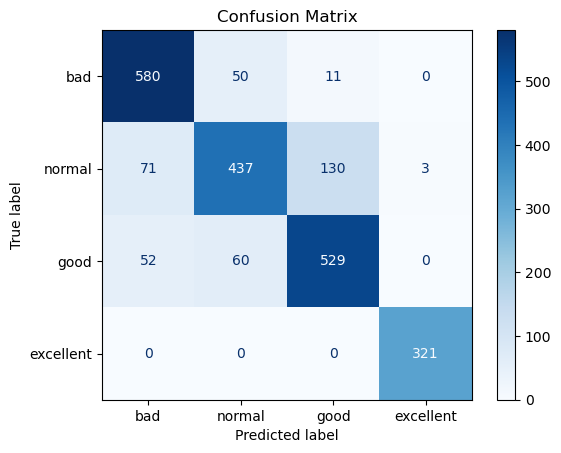

              precision    recall  f1-score   support

         bad       0.83      0.90      0.86       641
      normal       0.80      0.68      0.74       641
        good       0.79      0.83      0.81       641
   excellent       0.99      1.00      1.00       321

    accuracy                           0.83      2244
   macro avg       0.85      0.85      0.85      2244
weighted avg       0.83      0.83      0.83      2244



In [37]:
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto',probability=True)
classify(model, fea_train, tar_train)

# cross-validation
n_folds = 5
clf_cv = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto',probability=True)
scores = cross_val_score(clf_cv, fea_val, tar_val, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

# Predict on validation set
y_pred = model.predict(fea_val)

# Confusion matrix
cm = confusion_matrix(tar_val, y_pred)

# Visualisation
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'normal', 'good', 'excellent'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# classification report
print(classification_report(tar_val, y_pred, target_names=['bad', 'normal', 'good', 'excellent']))


### ANN - MLPClassifier

The classifier accuracy score of MLP is 0.90


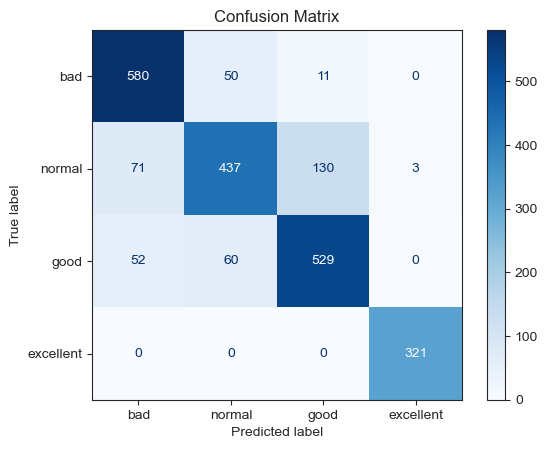

              precision    recall  f1-score   support

         bad       0.83      0.90      0.86       641
      normal       0.80      0.68      0.74       641
        good       0.79      0.83      0.81       641
   excellent       0.99      1.00      1.00       321

    accuracy                           0.83      2244
   macro avg       0.85      0.85      0.85      2244
weighted avg       0.83      0.83      0.83      2244



In [88]:
from sklearn.neural_network import MLPClassifier

# Use the function with your MLP classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,64,32),
                        random_state=1, 
                        alpha=0.1,
                        max_iter=300,
                        learning_rate_init=0.005)
mlp_clf_f = mlp_clf.fit(fea_train, tar_train)
mlp_clf_f.predict_proba(fea_val)
classifier_score = mlp_clf_f.score(fea_val, tar_val)
print('The classifier accuracy score of MLP is {:03.2f}'.format(classifier_score))

# Predict on validation set
y_pred = model.predict(fea_val)

# Confusion matrix
cm = confusion_matrix(tar_val, y_pred)

# Visualisation
sns.set_style("ticks")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'normal', 'good', 'excellent'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# classification report
print(classification_report(tar_val, y_pred, target_names=['bad', 'normal', 'good', 'excellent']))

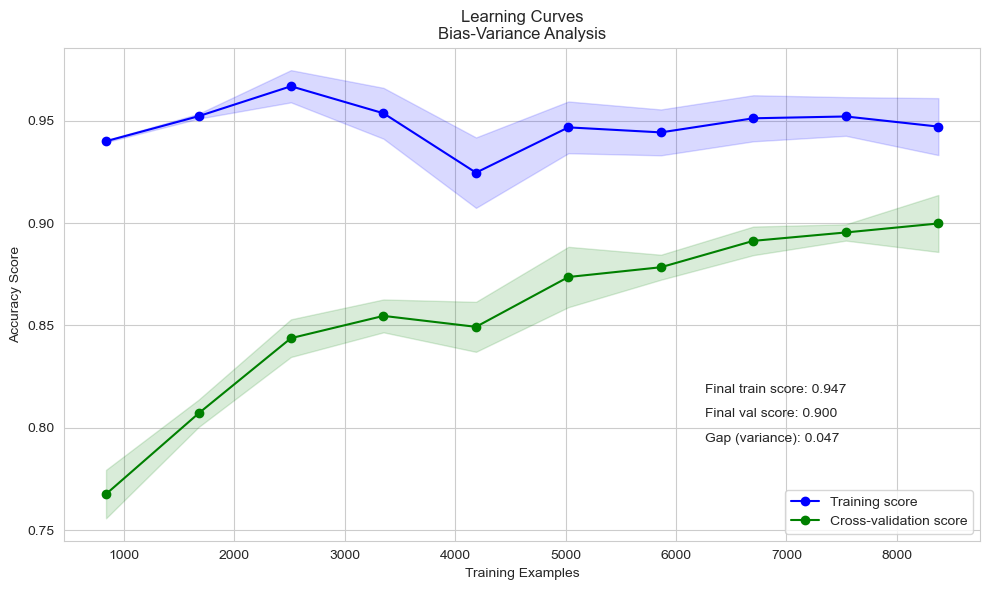

In [87]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, X, y):
    # Calculate learning curves
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y,
        cv=5,
        n_jobs=-1,
        train_sizes=train_sizes,
        scoring='accuracy'
    )

    # Calculate mean and std for training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))

    # Plot training and validation scores
    plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    
    plt.plot(train_sizes, val_mean, label='Cross-validation score', color='green', marker='o')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='green')

    # Add labels and title
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score')
    plt.title('Learning Curves\nBias-Variance Analysis')
    plt.legend(loc='lower right')
    
    # Final scores
    final_train_score = train_mean[-1]
    final_val_score = val_mean[-1]
    gap = final_train_score - final_val_score
    
    # Add annotations
    plt.annotate(f'Final train score: {final_train_score:.3f}', 
                xy=(0.7, 0.3), xycoords='axes fraction')
    plt.annotate(f'Final val score: {final_val_score:.3f}', 
                xy=(0.7, 0.25), xycoords='axes fraction')
    plt.annotate(f'Gap (variance): {gap:.3f}', 
                xy=(0.7, 0.2), xycoords='axes fraction')

    plt.tight_layout()
    return plt


plt = plot_learning_curves(mlp_clf, fea_train, tar_train)
plt.show()